# Data exploration

In [21]:
!ls -laFh ../data
!head -2 ../data/rates-indices-ccfi-scfi.csv
!echo ...
!tail -2 ../data/rates-indices-ccfi-scfi.csv

total 16
drwxr-xr-x  3 darnaud  staff    96B Aug 17 16:32 ./
drwxr-xr-x  5 darnaud  staff   160B Aug 17 16:33 ../
-rw-r--r--  1 darnaud  staff   5.1K Aug 17 17:00 rates-indices-ccfi-scfi.csv
week;ccfi;scfi
2013-W1;;1270
...
2018-W51;;
2018-W52;;


# Python libraries

In [2]:
import os
import pandas as pd
import numpy as np
from scipy import signal
from datetime import datetime
import matplotlib.pyplot as plt

# Utilities

In [41]:
def plot_timeseries (df_ts, save_pic=False):
    if save_pic:
        plt.figure()
        plt.xlabel('Rate indices every week')
        
        ax1 = df_ts['ccfi'].plot(x='week', grid=True, color='red', label='CCFI')
        ax2 = df_ts['scfi'].plot(x='week', secondary_y=True, grid=True, color='blue', label='SCFI')
        
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        
        plt.legend(h1+h2, l1+l2, loc=2)
        
        filename = 'img/' + df_ts.name + '.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.clf()

    #
    plt.figure()
    plt.xlabel('Rate indices every week')

    ax1 = df_ts['ccfi'].plot(x='week', grid=True, color='red', label='CCFI')
    ax2 = df_ts['scfi'].plot(x='week', secondary_y=True, grid=True, color='blue', label='SCFI')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()

    plt.legend(h1+h2, l1+l2, loc=2)
    
    plt.show()

In [4]:
def plot_image(filename):
    im = plt.imread(filename)
    plt.axis('off')
    plt.imshow(im)

In [20]:
import datetime
# Example: week #33 of 2018.
d = "2018-W33"
# The -5 corresponds to the week day, Friday here
r = datetime.datetime.strptime(d + '-5', '%Y-W%W-%w')
print(r)

2018-08-17 00:00:00


# CCFI index

In [29]:
path = '../data/'
filename = 'rates-indices-ccfi-scfi.csv'

dateparser = lambda x: pd.datetime.strptime(x + '-5', '%Y-W%W-%w')
df_rates_ccfi_scfi = pd.read_csv(path + filename, delimiter = ';', header = 0,
                                 parse_dates = ['week'], date_parser = dateparser)

# Extract month and year, for convenience
df_rates_ccfi_scfi['year'] = df_rates_ccfi_scfi['week'].dt.year
df_rates_ccfi_scfi['month'] = df_rates_ccfi_scfi['week'].dt.month

# The data-frame needs a name for the plot_image() function to work
df_rates_ccfi_scfi.name = 'rates-ccfi-scfi'

# Display the data-frame
df_rates_ccfi_scfi

,week,ccfi,scfi,year,month
0,2013-01-11,NaN,1270.0,2013,1
1,2013-01-18,NaN,1418.0,2013,1
2,2013-01-25,NaN,1349.0,2013,1
3,2013-02-01,NaN,1326.0,2013,2
4,2013-02-08,NaN,1316.0,2013,2
5,2013-02-15,NaN,1301.0,2013,2
6,2013-02-22,NaN,1199.0,2013,2
7,2013-03-01,NaN,1104.0,2013,3
8,2013-03-08,NaN,999.0,2013,3
9,2013-03-15,NaN,1423.0,2013,3


In [30]:
df_rates_ccfi_scfi.dtypes

week     datetime64[ns]
ccfi            float64
scfi            float64
year              int64
month             int64
dtype: object

In [31]:
len(df_rates_ccfi_scfi)

312

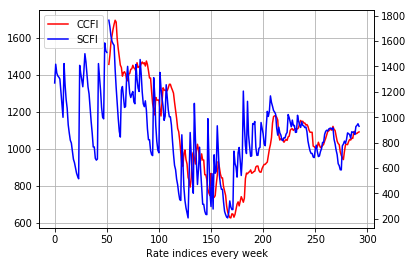

In [44]:
plot_timeseries(df_rates_ccfi_scfi, save_pic=False)

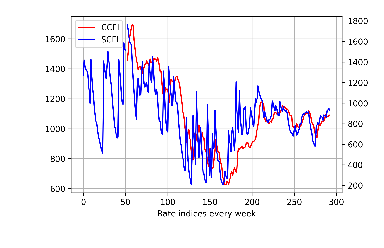

In [45]:
plot_image ('img/rates-ccfi-scfi.png')